# Project: Investigate a Dataset - [Medical Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 100K medical appointments in Brazil.<br>
Try to figure out why some patient after make the appointment don't show.<br>
<br>
Data Definition:<br>
<li><b>PatientId</b>: ID of a patient that is unique for each person.<br></li>
<li><b>AppointmentID</b>: ID of each appointment that is unique for each appointment.<br></li>
<li><b>Gender</b>: Male or Female.<br></li>
<li><b>AppointmentDay</b>: The day of the actual appointment, when they have to visit the doctor.<br></li>
<li><b>ScheduledDay</b>: The day patient called or registered the appointment.<br></li>
<li><b>Age</b>: Patient age.<br></li>
<li><b>Neighbourhood</b>: Where the appointment takes place.<br></li>
<li><b>Scholarship</b>: 1 or 0.(this is aprogram in Brazil like medical insurance for poor people)<br></li>
<li><b>Hipertension</b>: 1 or 0.<br></li>
<li><b>Diabetes</b>: 1 or 0.<br></li>
<li><b>Alcoholism</b>: 1 or 0.<br></li>
<li><b>Handcap</b>: 1 or 0.<br></li>
<li><b>SMS_received</b>: 1 or 0.<br></li>
<li><b>No-show</b>: "Yes" or "No". ("No" means they showed up on their appointments while "Yes" means they didn't!).<br></li>

    
### Question(s) for Analysis
<li><a href="#Question 1">Question 1: what's the percentage of no-show patients vs the showed ones?</a></li>
<li><a href="#Question 2">Question 2: Is the duration between registration and appointment affect the ability to show up?</a></li>
<li><a href="#Question 3">Question 3: Is a certain gender has more commitment to medical schedules than the other one?</a></li>
<li><a href="#Question 4">Question 4: Is a certain age has more commitment to medical schedules than the other one?</a></li>
<li><a href="#Question 5">Question 5: How do other factors like (Diabetes, Hypertension, Alcoholism, and Handicap) effect on show up?</a></li>
<li><a href="#Question 6">Question 6: Do patients who receive SMS to remind them of the appointment more likely to show up?</a></li>
<li><a href="#Question 7">Question 7: Where are the most appointments take place?</a></li>
<li><a href="#Question 8">Question 8: where is the most no-show take place?</a></li>
<li><a href="#Question 9">Question 9: Is scholarship patients are more committed to medical schedules?</a></li>
<li><a href="#Question 10">Question 10: Are first time patients are more commitment to medical schedules or ferquent ones? </a></li>
<li><a href="#Question 11">Question 11: Is the day of the week of the appointment effect on the ability to show up?</a></li>



<a id='wrangling'></a>
# Data Wrangling
<br>

In [1]:
# First import all libraries needed in analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# load Raw data file
raw_data = pd.read_csv ('noshowappointments-kagglev2-may-2016.csv')

In [3]:
raw_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
raw_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
raw_data.duplicated().sum()



0

In [7]:
raw_data.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


# First look at data

<b>this data set have 14 cloumns and 110527 rows.<br>
no null field in the data set.<br>
no duplicated values in data set.</b><br>
<br>
<b>columns data types not optmized.</b><br>
<li>make all columns lowercase.<br></li>
<li><b>PatientId</b> should be string.<br></li>
<li><b>AppointmentID</b> should be string.<br></li>
<li><b>ScheduledDay</b> should be datetime format.<br></li>
<li><b>AppointmentDay</b> should be datetime format.<br></li>
<li><b>no_show column is tricky i will change it to show_up with values 1 and 0.<br></li>
<br>   
<b>we have a negative age number should fix this.</b>
<br>

In [8]:
raw_data.columns = raw_data.columns.str.lower()


In [9]:
raw_data.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Fix columns datatypes
raw_data['patientid'] = raw_data['patientid'].apply(int)
raw_data['patientid'] = raw_data['patientid'].apply(str)
raw_data['appointmentid'] = raw_data['appointmentid'].apply(str)
raw_data['scheduledday'] = pd.to_datetime (raw_data['scheduledday'])
raw_data['appointmentday'] = pd.to_datetime (raw_data['appointmentday'])

In [11]:
raw_data.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [12]:
# change no_show title and data to be more understandable 
# we will change no_show to show_up with 1 for show up and 0 for no show
raw_data['no-show'].replace({"No": 1 ,"Yes" : 0 },inplace = True)
raw_data['no-show'] = pd.to_numeric(raw_data['no-show'])
raw_data = raw_data.rename(columns={"no-show":"show_up"})

In [13]:
raw_data.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1


In [14]:
# fixed age column and drop negative values
raw_data[raw_data["age"] < 0]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [15]:
raw_data = raw_data.drop([99832])

In [16]:
# Make sure negative values are dropped
raw_data[raw_data["age"] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up


# Now we finished clean the data 
### first we will preview data frame after make changes 
### then we save the cleaned data to new file then start data Analysis

In [17]:
raw_data


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110526 non-null  object             
 1   appointmentid   110526 non-null  object             
 2   gender          110526 non-null  object             
 3   scheduledday    110526 non-null  datetime64[ns, UTC]
 4   appointmentday  110526 non-null  datetime64[ns, UTC]
 5   age             110526 non-null  int64              
 6   neighbourhood   110526 non-null  object             
 7   scholarship     110526 non-null  int64              
 8   hipertension    110526 non-null  int64              
 9   diabetes        110526 non-null  int64              
 10  alcoholism      110526 non-null  int64              
 11  handcap         110526 non-null  int64              
 12  sms_received    110526 non-null  int64              
 13  show_up       

In [19]:
# Save Cleaned data to new data frame
df = raw_data

<a id='eda'></a>
# Data Analysis
<br>

array([[<AxesSubplot:title={'center':'scheduledday'}>,
        <AxesSubplot:title={'center':'appointmentday'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hipertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handcap'}>,
        <AxesSubplot:title={'center':'sms_received'}>],
       [<AxesSubplot:title={'center':'show_up'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

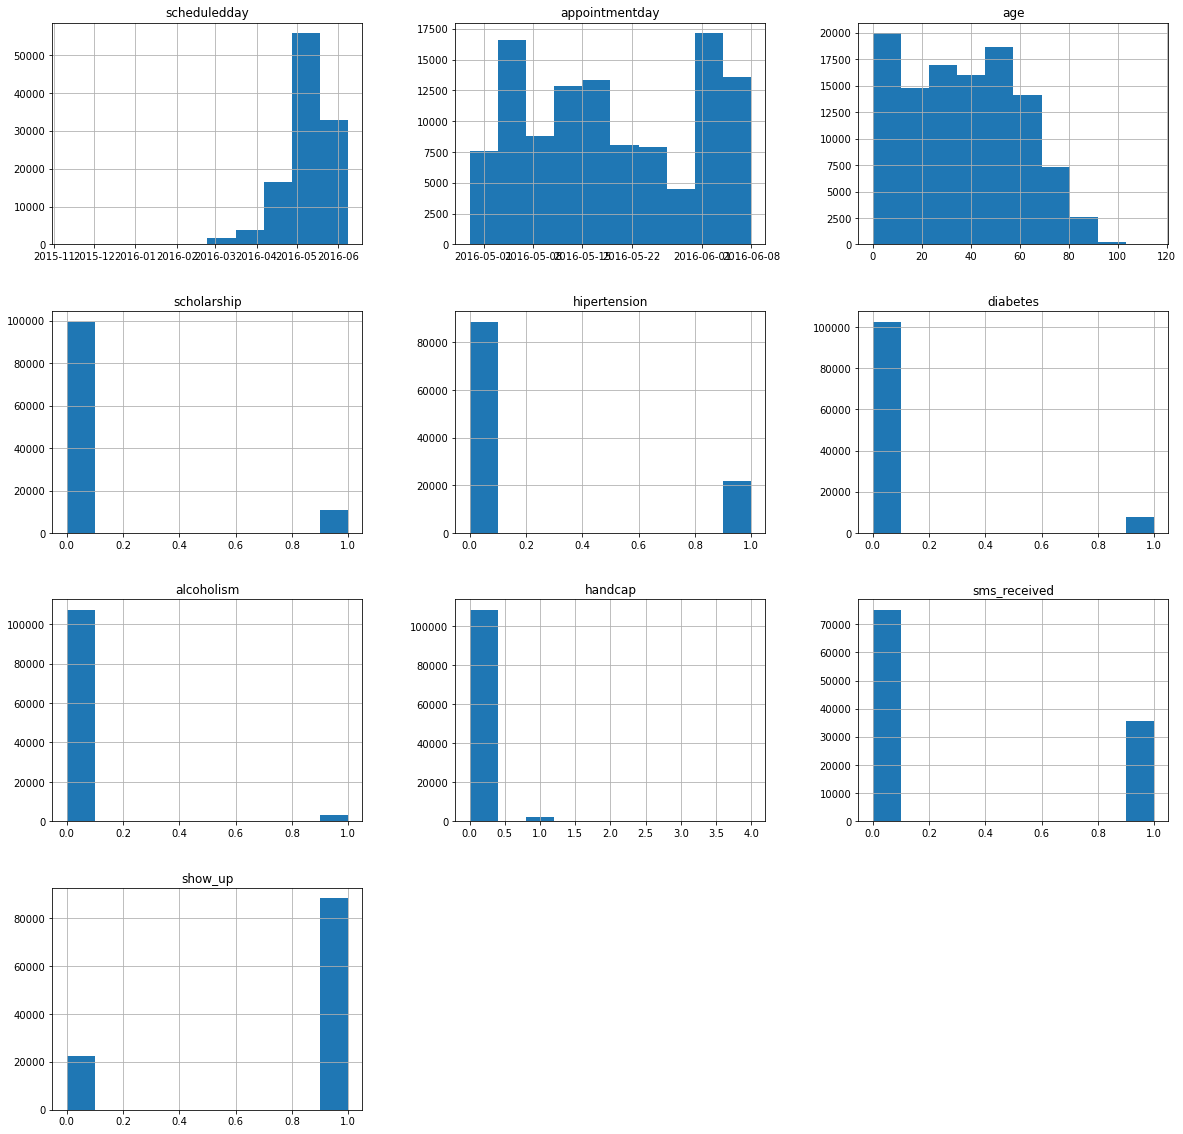

In [20]:
df.hist(figsize = (20,20))

<a id='Question 1'></a>
# Question 1 : what's the percentage of no-show patients vs the showed ones?

In [21]:
#count the number of show up
num_show_up = df[df['show_up'] == 1].count()['patientid']
#count the number of no show
num_no_show = df[df['show_up'] == 0].count()['patientid']

# Calculte the Percentage of show_up and no_show
perc_show_up = num_show_up / (num_show_up + num_no_show) * 100
perc_no_show = num_no_show / (num_show_up + num_no_show) * 100


## Answer

In [22]:
print ("The Percentage of Show Up Patients is : {}".format (perc_show_up))
print ("The Percentage of No Show Patients is : {}".format (perc_no_show))

The Percentage of Show Up Patients is : 79.80656135208005
The Percentage of No Show Patients is : 20.193438647919944


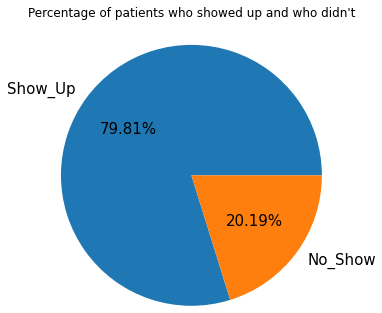

In [23]:
data = [num_show_up , num_no_show]
plt.pie(data , labels = ['Show_Up','No_Show'], radius = 1.5, textprops = {"fontsize":15}, autopct='%0.2f%%')
plt.title("Percentage of patients who showed up and who didn't", y=1.2);
plt.show()

<a id='Question 2'></a>
# Question 2 :Is the duration between registration and appointment affect the ability to show up?

In [24]:
# First we need to calculate the duration between c and scheduled day
df['duration'] = df['appointmentday'].dt.date - df['scheduledday'].dt.date

In [25]:
# remove string (days) from cloumn
df['duration'] = df['duration'].dt.days

In [26]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up,duration
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0


## Answer

In [27]:
df.groupby("show_up").mean()['duration']

show_up
0    15.831489
1     8.754759
Name: duration, dtype: float64

### Patient whose no show has a 15 days average duration between scheduled day and appointmentday <br>
### Patient whose show up has a 8 days average duration between scheduled day and appointmentday <br>
### So when duration increase the abiltiy of show up decrease

<a id='Question 3'></a>
# Question 3 :Is a certain gender has more commitment to medical schedules than the other one?

In [28]:
female_showup = df[df['gender']== 'F'].groupby('show_up').count()['patientid']

In [29]:
female_showup

show_up
0    14594
1    57245
Name: patientid, dtype: int64

In [30]:
perc_female_showup = female_showup[1] / (female_showup[0] + female_showup [1]) * 100 

In [31]:
perc_female_showup

79.68512924734476

In [32]:
male_showup = df[df['gender']== 'M'].groupby('show_up').count()['patientid']

In [33]:
male_showup

show_up
0     7725
1    30962
Name: patientid, dtype: int64

In [34]:
perc_male_showup = male_showup[1] / (male_showup[0] + male_showup [1]) * 100 

In [35]:
perc_male_showup

80.03205211052808

## Answer

In [36]:
print ("The Percentage of Show Up of Females is {} ".format (perc_female_showup))
print ("The Percentage of Show Up of Males is {} ".format (perc_male_showup))

The Percentage of Show Up of Females is 79.68512924734476 
The Percentage of Show Up of Males is 80.03205211052808 


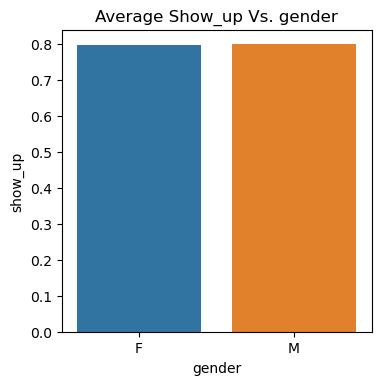

In [37]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x=df.gender, y=df.show_up ,ci = None)
plt.title('Average Show_up Vs. gender')
plt.show()

### So the 2 gender have almost the same commitment.

<a id='Question 4'></a>
# Question 4 :Is a certain age has more commitment to medical schedules than the other one?

In [38]:
# first we need to divide age values to groups (under_18 , age_18_30 , age_31_40 , age_41_50 , age_51_60 , above_60)
under_18_df = df[df['age'] < 18]
age_18_30_df = df[df['age'].between(18, 30, inclusive=True)]
age_31_40_df = df[df['age'].between(31, 40, inclusive=True)]
age_41_50_df = df[df['age'].between(41, 50, inclusive=True)]
age_51_60_df = df[df['age'].between(51, 60, inclusive=True)]
above_60_df = df[df['age'] > 60]

In [39]:
# now find the mean show_up vlaues for every group
under_18 = under_18_df.show_up.mean()
age_18_30 = age_18_30_df.show_up.mean()
age_31_40 = age_31_40_df.show_up.mean()
age_41_50 = age_41_50_df.show_up.mean()
age_51_60 = age_51_60_df.show_up.mean()
above_60 = above_60_df.show_up.mean()

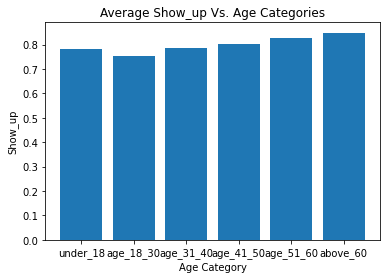

In [40]:
heights = [under_18, age_18_30, age_31_40, age_41_50, age_51_60, above_60]
X = [1,2,3,4,5,6]
heights = [under_18, age_18_30, age_31_40, age_41_50, age_51_60, above_60]
labels = ["under_18","age_18_30","age_31_40", "age_41_50", "age_51_60", "above_60"]
plt.bar(X, heights, tick_label=labels)
plt.title('Average Show_up Vs. Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Show_up');

### So as age increased the commitment to medical schedules increased 

<a id='Question 5'></a>
# Question 5 :How do other factors like (Diabetes, Hypertension, Alcoholism, and Handicap) effect on show up?

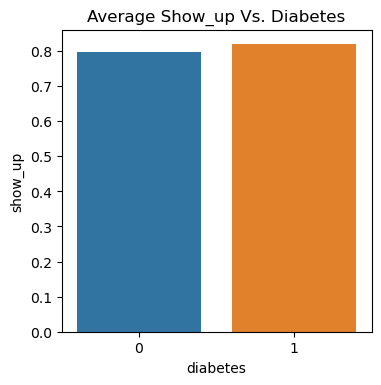

In [41]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x= df.diabetes, y= df.show_up,ci = None)
plt.title('Average Show_up Vs. Diabetes')
plt.show()

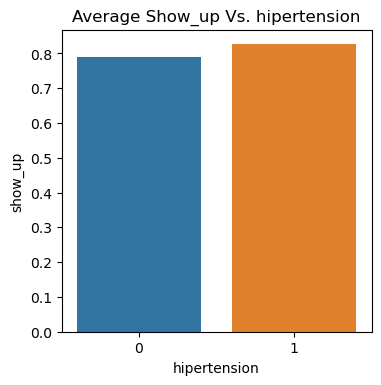

In [42]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x= df.hipertension, y= df.show_up,ci = None)
plt.title('Average Show_up Vs. hipertension')
plt.show()

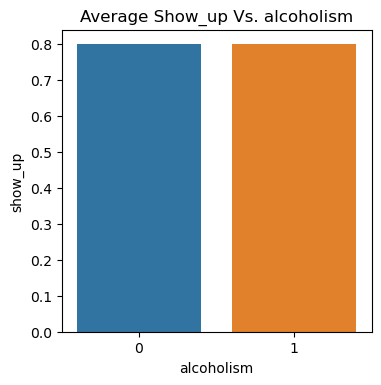

In [43]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x= df.alcoholism, y= df.show_up,ci = None)
plt.title('Average Show_up Vs. alcoholism')
plt.show()

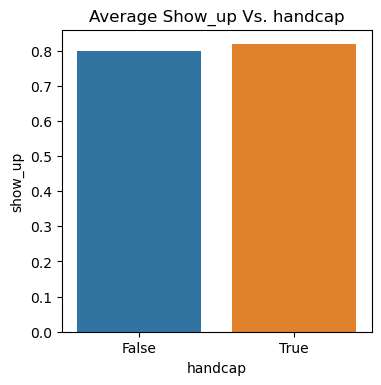

In [44]:
handcap = df['handcap'] > 0
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x= handcap, y= df.show_up,ci = None)
plt.title('Average Show_up Vs. handcap')
plt.show()

### as shown in graphs these factors have a very minor effect on show up so we can neglect it.

<a id='Question 6'></a>
# Question 6 : Do patients who receive SMS to remind them of the appointment more likely to show up?

In [45]:
with_SMS = df[df['sms_received'] == 1]['show_up'].mean()
with_SMS

0.7242545516036301

In [46]:
without_SMS = df[df['sms_received'] == 0]['show_up'].mean()
without_SMS

0.8329646607323703

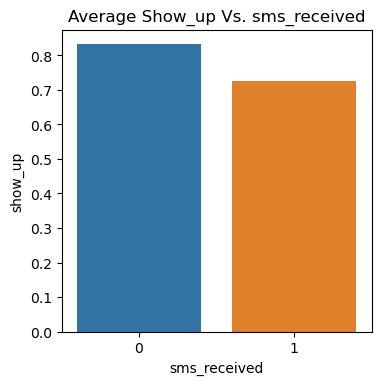

In [47]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x= df.sms_received, y= df.show_up,ci = None)
plt.title('Average Show_up Vs. sms_received')
plt.show()

### the data show that patient without SMS more commitment to show so we need to review the SMS rules because it didn't work as it should be

<a id='Question 7'></a>
# Question 7 : Where are the most appointments take place?



In [48]:
most_place = df['neighbourhood'].mode()[0]

In [49]:
print('the most appointments take place in {}'.format(most_place))

the most appointments take place in JARDIM CAMBURI


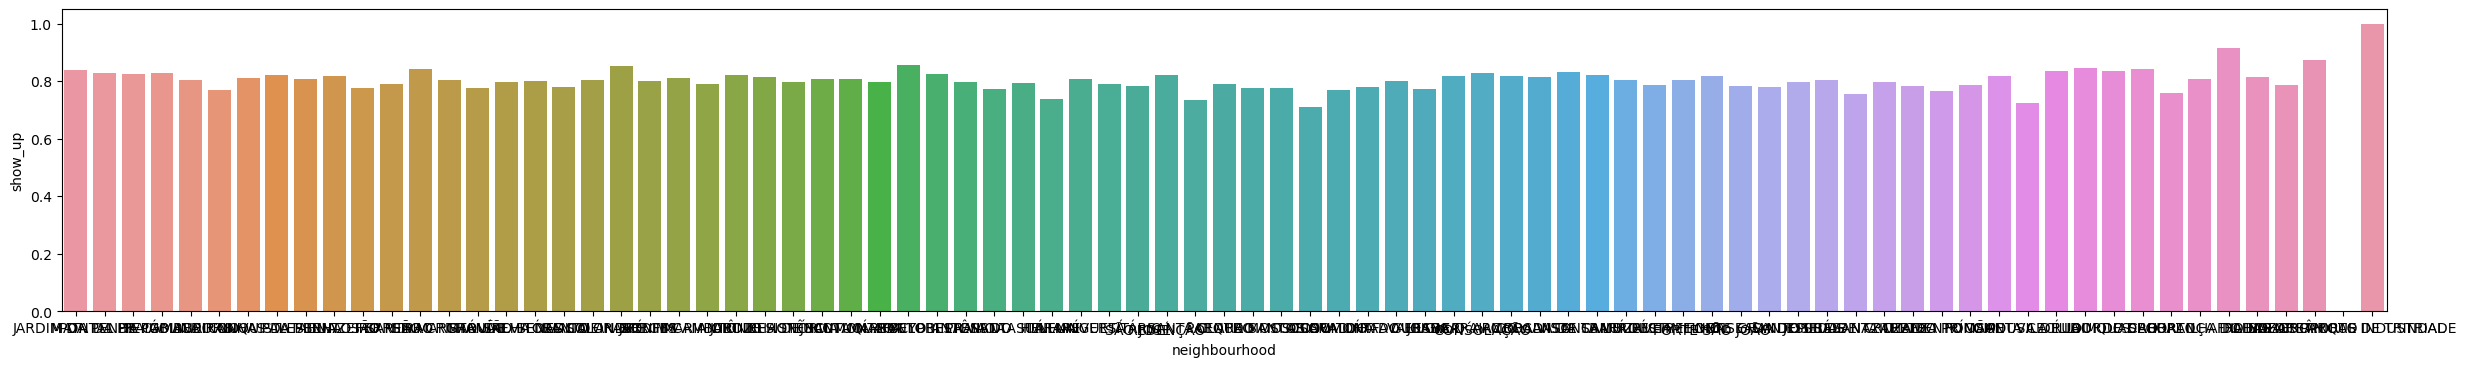

In [50]:
plt.figure(figsize = (30,4), dpi = 100)
sns.barplot(x= df.neighbourhood, y= df.show_up,ci = None)
plt.show()

<a id='Question 8'></a>
# Question 8 : where is the most no-show take place?

In [51]:
no_show_df = df[df['show_up'] == 0]

In [52]:
no_show_df['neighbourhood'].mode()[0]

'JARDIM CAMBURI'

<a id='Question 9'></a>
# Question 9 : Is scholarship patients are more committed to medical schedules?

In [53]:
df[df['scholarship'] == 1]['show_up'].mean()

0.7626369579228433

In [54]:
df[df['scholarship'] == 0]['show_up'].mean()

0.8019264536196258

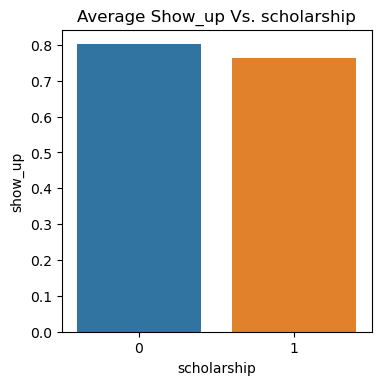

In [55]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x= df.scholarship, y= df.show_up ,ci = None)
plt.title('Average Show_up Vs. scholarship')
plt.show()

### So scholarship patients are a little less committed to medical schedules

<a id='Question 10'></a>
# Question 10: Are first time patients are more commitment to medical schedules or ferquent ones?

In [56]:
# first we need to create a new frame with frequent patients
frequent_patient = df[df.duplicated(subset = 'patientid',keep=False)]

In [57]:
frequent_patient['show_up'].mean()

0.7906400209346206

In [58]:
# now create a new frame with first time patients
first_time = df.drop_duplicates(subset = 'patientid' , keep=False)

In [59]:
first_time['show_up'].mean()

0.8122840792214985

### So first time patients are little more commitment to medical schedules than ferquent ones

<a id='Question 11'></a>
# Question 11 :Is the day of the week of the appointment effect on the ability to show up?

In [60]:
# first we create a day name column
df['day_of_week'] = df['appointmentday'].dt.day_name()

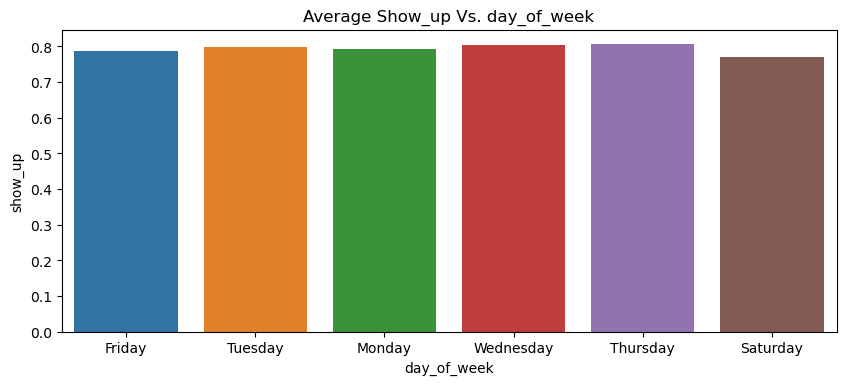

In [61]:
plt.figure(figsize = (10,4), dpi = 100)
sns.barplot(x= df.day_of_week, y= df.show_up, ci = None)
plt.title('Average Show_up Vs. day_of_week')

plt.show()

### as shown in graph all days almost the same

<a id='conclusions'></a>
# Conclusions

## after we investiage the data we have these results :<br>
   <li><b> The Percentage of Show Up Patients is : 79.80656135208005 </b></li><br>
   <li><b> The Percentage of No Show Patients is : 20.193438647919944</b></li><br>
   <li><b> When duration increase the abiltiy of show up decrease.</b></li><br>
   <li><b> Patient whose no show has a 15 days average duration between scheduled day and appointmentday.</b></li><br>
   <li><b> Patient whose show up has a 8 days average duration between scheduled day and appointmentday.</b></li><br>
   <li><b> The males and females have almost the same commitment to medical appointment.</b></li><br>
   <li><b> When age increased the commitment to medical schedules increased.</b></li><br>
   <li><b> Older people are more commitment to medical schedules.</b></li><br>
   <li><b> Diabetes, Hypertension, Alcoholism, and Handicap have a very minor effect on show up so we can neglect them.</b></li><br>
   <li><b> SMS is not effective way to remind the patients we need to improve it.</b></li><br>
   <li><b> The most appointments take place in JARDIM CAMBURI.</b></li><br>
   <li><b> First time patients are little more commitment to medical schedules than ferquent ones.</b></li><br>
   <li><b> Scholarship patients are a little less committed to medical schedules.</b></li><br>
    
    
    